In [51]:
import os
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 分割されたratingのtsvを統合
data_list = []
root_dir = 'sourcecode/data'

col_names = [""]
data_list.append(pd.read_csv(os.path.join(root_dir, 'ratings-00000.tsv')))
data_list.append(pd.read_csv(os.path.join(root_dir, 'ratings-00001.tsv')))

df = pd.concat(data_list, axis=0, sort=False)
df.to_csv(os.path.join(root_dir, 'ratings-total.tsv'), index=False)

In [66]:
# raterの必要なカラムのみ抽出
root_dir = 'sourcecode/data'

rating = pd.read_csv(os.path.join(root_dir, 'ratings-total.tsv'), delimiter='\t')
rating_helpful = rating[rating["helpfulnessLevel"] == "HELPFUL"]
extract_rating_helpful = rating_helpful.loc[:, ["noteId", "raterParticipantId"]]
print(extract_rating_helpful.shape)

(7674286, 2)


In [34]:
# noteとuserの必要な属性を抽出
note = pd.read_csv(os.path.join(root_dir, 'scored_notes.tsv'), delimiter='\t')
extract_note = note.loc[:, ["noteId", "finalRatingStatus"]]
note_dict = {}
for n in extract_note.itertuples():
    note_dict[str(n[1])] = n[2] 

user = pd.read_csv(os.path.join(root_dir, 'helpfulness_scores.tsv'), delimiter='\t')
extract_user = user.loc[:, ["raterParticipantId", "coreRaterFactor1"]]
user_dict = {}
for u in extract_user.itertuples():
    user_dict[str(u[1])] = u[2] 

In [67]:
# raterごとに対象noteが "HELPFUL" か "NEEDS_MORE_RATINGS" か確認
# それぞれの場合でraterのfactor(noteごとにもつfactorに対する反応度→分極度合い)を格納
helpful_user_factor = []
need_user_factor = []
not_factor_user_cnt = 0
not_factor_note_cnt = 0

for i, r in enumerate(extract_rating_helpful.itertuples()):
    #print(r[1])
    
    if r[2] in user_dict:  # factorがつけられたuserのみ抽出(filteringされている)
        if str(r[1]) in note_dict: # factorがつけられたnoteのみ抽出(filteringされている)
            if note_dict[str(r[1])] == "CURRENTLY_RATED_HELPFUL":
                #print("CURRENTLY_RATED_HELPFUL")
                helpful_user_factor.append(user_dict[r[2]])


            elif note_dict[str(r[1])] == "NEEDS_MORE_RATINGS":
                #print("NEEDS_MORE_RATINGS")
                need_user_factor.append(user_dict[r[2]])
                
        else:
            not_factor_note_cnt += 1
            
    else:
        not_factor_user_cnt += 1

    #if i > 5:
        #break
        
    if i % 100000 == 0:
        print(f'{np.round(100 * i / extract_rating_helpful.shape[0], decimals=2)} %' )
    


0.0 %
1.3 %
2.61 %
3.91 %
5.21 %
6.52 %
7.82 %
9.12 %
10.42 %
11.73 %
13.03 %
14.33 %
15.64 %
16.94 %
18.24 %
19.55 %
20.85 %
22.15 %
23.45 %
24.76 %
26.06 %
27.36 %
28.67 %
29.97 %
31.27 %
32.58 %
33.88 %
35.18 %
36.49 %
37.79 %
39.09 %
40.39 %
41.7 %
43.0 %
44.3 %
45.61 %
46.91 %
48.21 %
49.52 %
50.82 %
52.12 %
53.43 %
54.73 %
56.03 %
57.33 %
58.64 %
59.94 %
61.24 %
62.55 %
63.85 %
65.15 %
66.46 %
67.76 %
69.06 %
70.36 %
71.67 %
72.97 %
74.27 %
75.58 %
76.88 %
78.18 %
79.49 %
80.79 %
82.09 %
83.4 %
84.7 %
86.0 %
87.3 %
88.61 %
89.91 %
91.21 %
92.52 %
93.82 %
95.12 %
96.43 %
97.73 %
99.03 %


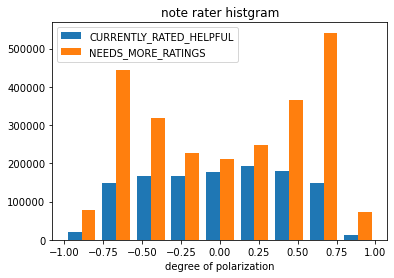

In [68]:
# "CURRENTLY_RATED_HELPFUL", "NEEDS_MORE_RATINGS" になったnoteを評価したuserのfactorの総計ヒストグラム
bins = np.linspace(-1, 1, 10)
helpful_user_factor_arr = np.array(helpful_user_factor)
need_user_factor_arr = np.array(need_user_factor)

plt.hist([helpful_user_factor_arr, need_user_factor_arr], bins, label=["CURRENTLY_RATED_HELPFUL", "NEEDS_MORE_RATINGS"])
plt.legend()
plt.xlabel("degree of polarization")
plt.title("note rater histgram")
plt.savefig("note_rator_histgram_polarization.png")

In [71]:
print(f"filteringされたnoteの割合：{np.round(100 * not_factor_note_cnt/ extract_rating_helpful.shape[0], decimals=2)} %")
print(f"filteringされたuserの割合：{np.round(100 * not_factor_user_cnt/ extract_rating_helpful.shape[0], decimals=2)} %")

filteringされたnoteの割合：10.52 %
filteringされたuserの割合：17.52 %
